## Esse capítulo vai mostrar alguns comandos que mostram os tempos de execuções de determinadas tarefas para comparação

### A maneira mais fácil de fazer isso é utilizando o comando %timeit. A saída é a média e desvio padrão de várias execuções. Para usar basta colocar esse comando antes do código.

### A unidade de medida pode ser algumas dessas:
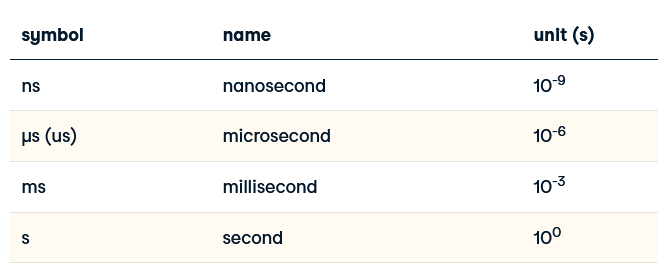

In [1]:
import numpy as np

In [2]:
%timeit rand_nums = np.random.rand(1000)

9.31 µs ± 198 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Também podemos configurar o número de execuções e número de loops de cada execução

In [3]:
# 2 execuções com 10 loops em cada um
%timeit -r2 -n10 rand_nums = np.random.rand(1000)

The slowest run took 11.44 times longer than the fastest. This could mean that an intermediate result is being cached.
74.2 µs ± 62.3 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


## Se quisermos usar em mais de uma linha de código, devemos o usar o comando %%timeit e uma linha antes do código a ser analisado

In [5]:
%%timeit
nums = []
for x in range(10):
    nums.append(x)

797 ns ± 77.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Também podemos usar o argumento -o para salvar os tempos e analisar, se for necessário

In [6]:
times = %timeit -o rand_nums = np.random.rand(1000)

10.1 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
times.timings

[9.53627799999822e-06,
 8.597449000001234e-06,
 9.009177000000363e-06,
 1.0894000000000687e-05,
 1.0711393000001407e-05,
 1.1830215999998473e-05,
 1.0142701000002034e-05]

In [9]:
max(times.timings)

1.1830215999998473e-05

## Se quisermos comparar os tempos de criação de um dicionário usando {} ou dict(), basta usar o %time it e comparar os resultados:

In [10]:
%timeit formal_dict = dict()

97.6 ns ± 6.73 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [11]:
%timeit literal_dict = {}

46.9 ns ± 27.5 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Assim, concluindo que usar {} é mais eficiente do que usar dict()

## E se quisermos ver uma análise detalhada de eficiência linha por linha de uma função? Existe uma forma de verificar o tempo executado e a porcentagem em relação a função inteira.
### Antes, precisamos baixar o pacote line_profiler via pip

In [12]:
heroes = ['Batman', 'Superman', 'Wonder Woman']
hts = np.array([188.0, 191.0, 183.0])
wts = np.array([ 95.0, 101.0, 74.0])

In [13]:
def convert_units(heroes, heights, weights):
    new_hts = [ht * 0.39370 for ht in heights]
    new_wts = [wt * 2.20462 for wt in weights]
    hero_data = {}
    for i,hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])
    return hero_data

In [14]:
convert_units(heroes, hts, wts)

{'Batman': (74.01559999999999, 209.4389),
 'Superman': (75.19669999999999, 222.66661999999997),
 'Wonder Woman': (72.0471, 163.14188)}

In [15]:
%load_ext line_profiler

In [18]:
# Observação: A saída dessa comando não aparece no jupyter. Precisa executar para ver a saída em outra página.
%lprun -f convert_units convert_units(heroes, hts, wts)

## Existe uma versão do line_profiler para uso de memória, chamado memory_profiler. Onde precisamos baixar via pip. A desvantagem de analisar isso é que temos chamar a função de outro arquivo python, nesse caso, chamarei do arquivo hero_funcs.py

In [21]:
from hero_funcs import convert_units

In [22]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [23]:
# Observação: A saída dessa comando não aparece no jupyter. Precisa executar para ver a saída em outra página.
%mprun -f convert_units convert_units(heroes, hts, wts)